In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

C:\Users\aravi\AppData\Local\Temp\ipykernel_22840\1136271226.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#loading encoded data from csv

train_encoded = pd.read_csv("data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_encoded = pd.read_csv("data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

In [3]:
train_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,0
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,1
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,0


In [4]:
test_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
0,0,1,49,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,0
1,2,1,20,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,1
2,0,0,14,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,0
3,1,1,60,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,0
4,0,1,24,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21,1


In [5]:
xtrain = train_encoded.drop('binaryoutcome', axis=1)
ytrain = train_encoded[['binaryoutcome']]
xtest = test_encoded.drop('binaryoutcome', axis=1)
ytest = test_encoded[['binaryoutcome']]

In [6]:
# Feature selection using Chi-square
chi2_selector = SelectKBest(chi2, k=42)  # Select top 10 features (you can change this value)
X_chi2 = chi2_selector.fit_transform(xtrain,ytrain)

In [7]:
# Get the selected features
selected_features = xtrain.columns[chi2_selector.get_support()]
chi2_values = chi2_selector.scores_

In [8]:
# Display the selected features and Chi-square values
print("Selected Features and Chi-square Values:")
for feature, chi2_value in zip(selected_features, chi2_values):
    print(f"{feature}: {chi2_value}")

Selected Features and Chi-square Values:
duration: 7082565.303892097
protocol_type: 1723.289569546626
service: 82437.93955815387
flag: 54653.93292607195
src_bytes: 3340257591.4457445
dst_bytes: 1746063122.1702244
land: 6.512199407543797
wrong_fragment: 3282.6784240150096
urgent: 1.8171812299380998
hot: 487.6709925760863
num_failed_logins: 2.974008944179703
logged_in: 36259.73858447517
num_compromised: 26894.75327950227
root_shell: 51.7693680244827
su_attempted: 117.30529554402624
num_root: 32550.97103273541
num_file_creations: 1053.5739886776714
num_shells: 13.471339029383252
num_access_files: 409.03396567974767
num_outbound_cmds: nan
is_host_login: 0.8706305129042797
is_guest_login: 192.5319501544994
count: 6525616.721263824
srv_count: 14.13591775299517
serror_rate: 37364.83553764291
srv_serror_rate: 37451.32465887905
rerror_rate: 6923.373013273987
srv_rerror_rate: 6997.367717676969
same_srv_rate: 20826.414096268774
diff_srv_rate: 2694.210071542976
srv_diff_host_rate: 1245.39526215783

In [9]:
sorted(zip(selected_features, chi2_values),key = lambda x: x[1],reverse=True)

[('src_bytes', 3340257591.4457445),
 ('dst_bytes', 1746063122.1702244),
 ('duration', 7082565.303892097),
 ('num_outbound_cmds', nan),
 ('dst_host_srv_count', 6968826.69801921),
 ('count', 6525616.721263824),
 ('dst_host_count', 957425.8043037683),
 ('service', 82437.93955815387),
 ('flag', 54653.93292607195),
 ('dst_host_srv_serror_rate', 38543.822243196206),
 ('srv_serror_rate', 37451.32465887915),
 ('serror_rate', 37364.83553764282),
 ('dst_host_serror_rate', 37225.46649295039),
 ('logged_in', 36259.73858447517),
 ('num_root', 32550.97103273541),
 ('num_compromised', 26894.75327950227),
 ('dst_host_same_srv_rate', 23448.20853873126),
 ('same_srv_rate', 20826.414096267596),
 ('srv_rerror_rate', 6997.367717676945),
 ('rerror_rate', 6923.373013273969),
 ('dst_host_srv_rerror_rate', 6866.941117391947),
 ('dst_host_rerror_rate', 6354.755807979228),
 ('level', 4889.745829142064),
 ('wrong_fragment', 3282.6784240150096),
 ('dst_host_diff_srv_rate', 3197.8426151047825),
 ('diff_srv_rate', 2

## Manual Calculation

In [10]:
chi2_values = chi2(xtrain,ytrain)[0]

In [11]:
features = xtrain.columns

In [12]:
sorted(zip(features, chi2_values),key = lambda x: x[1],reverse=True)

[('src_bytes', 3340257591.4457445),
 ('dst_bytes', 1746063122.1702244),
 ('duration', 7082565.303892097),
 ('num_outbound_cmds', nan),
 ('dst_host_srv_count', 6968826.69801921),
 ('count', 6525616.721263824),
 ('dst_host_count', 957425.8043037683),
 ('service', 82437.93955815387),
 ('flag', 54653.93292607195),
 ('dst_host_srv_serror_rate', 38543.822243196206),
 ('srv_serror_rate', 37451.32465887915),
 ('serror_rate', 37364.83553764282),
 ('dst_host_serror_rate', 37225.46649295039),
 ('logged_in', 36259.73858447517),
 ('num_root', 32550.97103273541),
 ('num_compromised', 26894.75327950227),
 ('dst_host_same_srv_rate', 23448.20853873126),
 ('same_srv_rate', 20826.414096267596),
 ('srv_rerror_rate', 6997.367717676945),
 ('rerror_rate', 6923.373013273969),
 ('dst_host_srv_rerror_rate', 6866.941117391947),
 ('dst_host_rerror_rate', 6354.755807979228),
 ('level', 4889.745829142064),
 ('wrong_fragment', 3282.6784240150096),
 ('dst_host_diff_srv_rate', 3197.8426151047825),
 ('diff_srv_rate', 2

In [13]:
xtrain[['num_outbound_cmds']].value_counts()

num_outbound_cmds
0                    125972
dtype: int64

## KNN

In [13]:

pd.DataFrame([list(selected_features),list(chi2_values)])

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
1,7082565.303892,1723.28957,82437.939558,54653.932926,3340257591.445745,1746063122.170224,6.512199,3282.678424,1.817181,487.670993,...,6968826.698019,23448.208539,3197.842615,692.756756,190.55391,37225.466493,38543.822243,6354.755808,6866.941117,4889.745829


In [14]:
import numpy as np

In [20]:
sorted_chi2 = pd.DataFrame(np.array([list(selected_features),list(chi2_values)]).T,columns=['feature','chi2'])

In [24]:
sorted_chi2.index = sorted_chi2.feature

In [28]:
# sorted_chi2.drop('feature',axis=1).to_csv('chi2/sorted_chi2.csv')

In [8]:
chi2_sorted = pd.read_csv('chi2/sorted_chi2.csv').sort_values(by='chi2',ascending=False)
chi2_sorted

,feature,chi2
22,src_bytes,3.340258e+09
33,dst_bytes,1.746063e+09
3,duration,7.082565e+06
5,dst_host_srv_count,6.968827e+06
9,count,6.525617e+06
1,dst_host_count,9.574258e+05
2,service,8.243794e+04
12,flag,5.465393e+04
17,dst_host_srv_serror_rate,3.854382e+04
18,srv_serror_rate,3.745132e+04


In [9]:
xtrain = train_encoded.drop('binaryoutcome', axis=1)
ytrain = train_encoded['binaryoutcome']
xtest = test_encoded.drop('binaryoutcome', axis=1)
ytest = test_encoded['binaryoutcome']

In [10]:
feature_sorted = list(chi2_sorted.feature)

In [11]:
feature_sorted

['src_bytes',
 'dst_bytes',
 'duration',
 'dst_host_srv_count',
 'count',
 'dst_host_count',
 'service',
 'flag',
 'dst_host_srv_serror_rate',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'logged_in',
 'num_root',
 'num_compromised',
 'dst_host_same_srv_rate',
 'same_srv_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_rerror_rate',
 'level',
 'wrong_fragment',
 'dst_host_diff_srv_rate',
 'diff_srv_rate',
 'protocol_type',
 'srv_diff_host_rate',
 'num_file_creations',
 'dst_host_same_src_port_rate',
 'hot',
 'num_access_files',
 'is_guest_login',
 'dst_host_srv_diff_host_rate',
 'su_attempted',
 'root_shell',
 'srv_count',
 'num_shells',
 'land',
 'num_failed_logins',
 'urgent',
 'is_host_login',
 'num_outbound_cmds']

In [12]:

def train_knn_plot(n,feature_sorted=feature_sorted):
    score=dict()
    for i in range(1,len(feature_sorted)+1):
        x = xtrain[xtrain.columns.intersection(feature_sorted[:i])]
        x_t = xtest[xtest.columns.intersection(feature_sorted[:i])]
        knn = KNeighborsClassifier(n)
        print("------i=",i,"---------")
        print("features = ",feature_sorted[:i])
        knn.fit(x,ytrain)
        score[i] = knn.score(x_t,ytest)

    x,y = zip(*score.items())
    return x,y

In [15]:
k_score = dict()

for k in range(1,10):
    
    k_score[k] = train_knn_plot(k)
    print("----------k is ",k,"------------------")

------i= 1 ---------
features =  ['src_bytes']
------i= 2 ---------
features =  ['src_bytes', 'dst_bytes']
------i= 3 ---------
features =  ['src_bytes', 'dst_bytes', 'duration']
------i= 4 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count']
------i= 5 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count']
------i= 6 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count']
------i= 7 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service']
------i= 8 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service', 'flag']
------i= 9 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service', 'flag', 'dst_host_srv_serror_rate']
------i= 10 ---------
features =  ['src_bytes', 'dst_bytes', 'd

C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


------i= 17 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service', 'flag', 'dst_host_srv_serror_rate', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'logged_in', 'num_root', 'num_compromised', 'dst_host_same_srv_rate', 'same_srv_rate']
------i= 18 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service', 'flag', 'dst_host_srv_serror_rate', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'logged_in', 'num_root', 'num_compromised', 'dst_host_same_srv_rate', 'same_srv_rate', 'srv_rerror_rate']
------i= 19 ---------
features =  ['src_bytes', 'dst_bytes', 'duration', 'dst_host_srv_count', 'count', 'dst_host_count', 'service', 'flag', 'dst_host_srv_serror_rate', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'logged_in', 'num_root', 'num_compromised', 'dst_host_same_srv_rate', 'same_srv_rate', 'srv_rerror_rate', 'rerror_rate']
-----

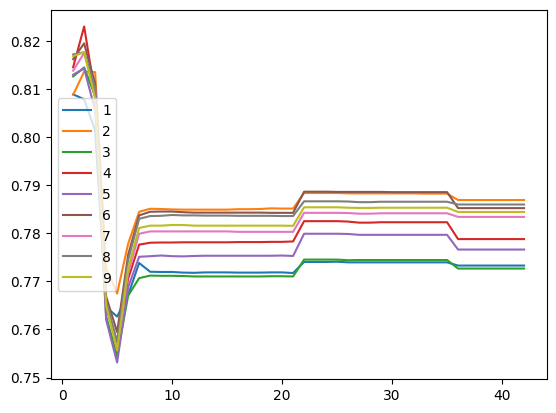

In [16]:
for k in k_score:

    plt.plot(k_score[k][0],k_score[k][1])
    
plt.legend(list(k_score.keys()))
plt.show()

## Pearson

In [17]:
pearson_features = pd.read_csv("pearson/sorted_pearson_feature.csv")
pearson_features = pearson_features.sort_values(by='binaryoutcome',ascending=False)

In [18]:
pearson_features = pearson_features[pearson_features.feature != 'binaryoutcome']
pearson_features

,feature,binaryoutcome
40,same_srv_rate,0.751912
39,dst_host_srv_count,0.722546
38,dst_host_same_srv_rate,0.693813
37,logged_in,0.690181
36,flag,0.647071
35,level,0.379707
34,protocol_type,0.281357
33,srv_diff_host_rate,0.119380
32,is_guest_login,0.039280
31,num_access_files,0.036701


In [19]:
pearson_features = list(pearson_features.feature)

In [20]:
k_score = dict()

for k in range(1,10):
    
    k_score[k] = train_knn_plot(k,pearson_features)

------i= 1 ---------
features =  ['same_srv_rate']
------i= 2 ---------
features =  ['same_srv_rate', 'dst_host_srv_count']
------i= 3 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']
------i= 4 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in']
------i= 5 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag']
------i= 6 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level']
------i= 7 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type']
------i= 8 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate']
------i= 9 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'lo

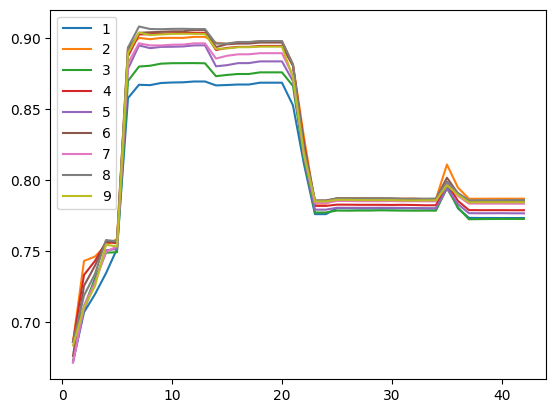

In [21]:
for k in k_score:

    plt.plot(k_score[k][0],k_score[k][1])
    
plt.legend(list(k_score.keys()))
plt.show()